<a href="https://colab.research.google.com/github/caropeboka/voice-classification/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load data
data = pd.read_csv('drive/MyDrive/Dataset/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
#dataset analysis
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


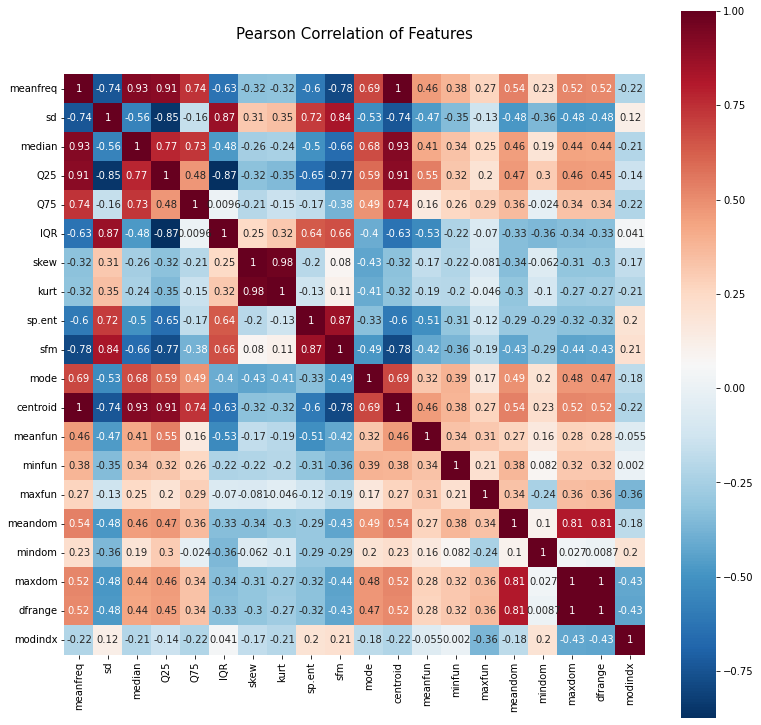

In [ ]:
#plotting correlation table
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.iloc[:,:-1].astype(float).corr(),vmax=1.0, square=True,cmap="RdBu_r",annot=True)

In [ ]:
#preparing data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=data.drop(['maxdom', 'centroid', 'kurt'],axis=1)

In [ ]:
X=df.drop(['label'],axis=1)
y=df['label']

In [ ]:
#label encoding
y=y.map({'male':0,'female':1})

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#decision tree classifier
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_dt = dt_model.predict(X_test)
score_dt = round(accuracy_score(y_test,y_dt)*100, 3)
print("Accuracy score: ",score_dt,"%")
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_dt))
print("\nClassification Report: \n",classification_report(y_test,y_dt))

Accuracy score:  95.426 %

Confusion Matrix: 
 [[321  12]
 [ 17 284]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       333
           1       0.96      0.94      0.95       301

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



In [ ]:
#support vector machine(svm)
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_svm = svm_model.predict(X_test)
score_svm = round(accuracy_score(y_test,y_svm)*100, 3)
print("Accuracy score: ",score_svm,"%")
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_svm))
print("\nClassification Report: \n",classification_report(y_test,y_svm))

Accuracy score:  98.58 %

Confusion Matrix: 
 [[327   6]
 [  3 298]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.98      0.99      0.99       301

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [ ]:
#naive bayes
from sklearn import naive_bayes
nb_model=naive_bayes.GaussianNB()
nb_model.fit(X_train, y_train)
y_nb = nb_model.predict(X_test)
score_nb = round(accuracy_score(y_test,y_nb)*100, 3)
print("Accuracy score: ",score_nb,"%")
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_nb))
print("\nClassification Report: \n",classification_report(y_test,y_nb))

Accuracy score:  90.694 %

Confusion Matrix: 
 [[308  25]
 [ 34 267]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       333
           1       0.91      0.89      0.90       301

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



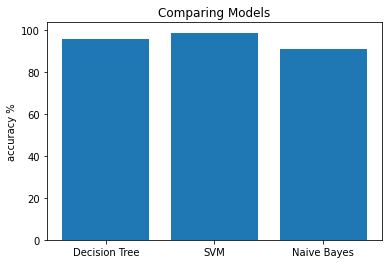

In [ ]:
from matplotlib.ticker import FuncFormatter

x = np.arange(3)
accuracy = [score_dt,score_svm,score_nb]

fig, ax = plt.subplots()
plt.bar(x, accuracy)
plt.xticks(x, ('Decision Tree','SVM','Naive Bayes'))
ax.set_ylabel('accuracy %')
ax.set_title('Comparing Models')
plt.show()